<a href="https://colab.research.google.com/github/Tanmay240405/paint-By-Numbers/blob/main/paintByNumbers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python-headless scikit-learn pillow matplotlib


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image
from google.colab import files


In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (600, 600))


Saving PicsArt_02-28-09.06.27.webp to PicsArt_02-28-09.06.27.webp


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

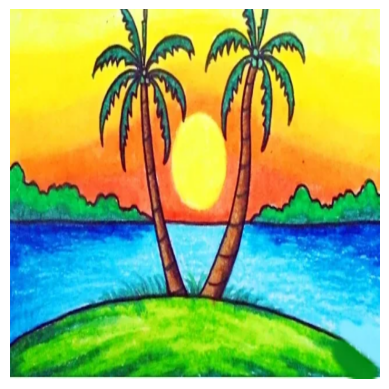

In [ ]:
plt.imshow(img)
plt.axis('off')



In [ ]:
level = int(input("Enter difficulty level (1, 2, or 3): "))

if level == 1:
    K = 6
elif level == 2:
    K = 12
elif level == 3:
    K = 24
else:
    raise ValueError("Invalid level")


Enter difficulty level (1, 2, or 3): 2


In [ ]:
pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)

kmeans = KMeans(n_clusters=K, random_state=42)
labels = kmeans.fit_predict(pixels)
palette = np.uint8(kmeans.cluster_centers_)

segmented = palette[labels].reshape(img.shape)


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

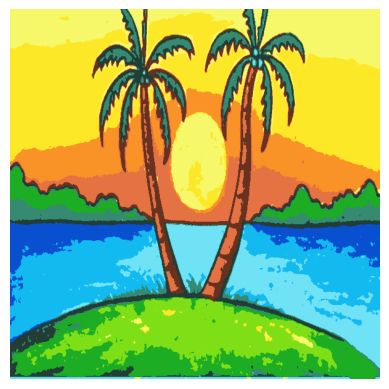

In [ ]:
plt.imshow(segmented)
plt.axis('off')


In [ ]:
gray = cv2.cvtColor(segmented, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 50, 150)

kernel = np.ones((3,3), np.uint8)
edges = cv2.dilate(edges, kernel)

canvas = np.ones_like(img) * 255
canvas[edges > 0] = [0, 0, 0]


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

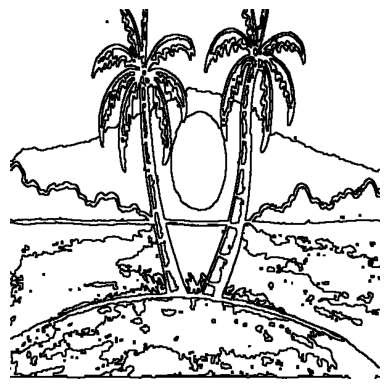

In [ ]:
plt.imshow(canvas)
plt.axis('off')


In [ ]:
label_map = labels.reshape(img.shape[:2])
output = canvas.copy()

for i in range(K):
    mask = (label_map == i).astype(np.uint8) * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        if cv2.contourArea(cnt) > 500:
            M = cv2.moments(cnt)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.putText(
                    output,
                    str(i+1),
                    (cx-10, cy+10),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.5,
                    (0,0,0),
                    1
                )


(np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5))

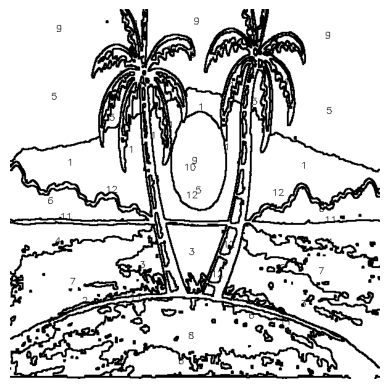

In [ ]:
plt.imshow(output)
plt.axis('off')


(np.float64(-0.5), np.float64(719.5), np.float64(59.5), np.float64(-0.5))

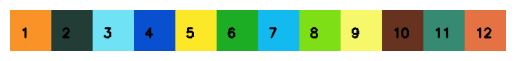

In [ ]:
palette_img = np.ones((60, 60*K, 3), dtype=np.uint8) * 255

for i, color in enumerate(palette):
    palette_img[:, i*60:(i+1)*60] = color
    cv2.putText(
        palette_img,
        str(i+1),
        (i*60 + 15, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (0,0,0),
        2
    )

plt.imshow(palette_img)
plt.axis('off')

